# 💄**BeautyBytes: Data-Driven Insights and Personalization in the Cosmetics Industry**

## 💡 Problem Statement
With the surge in online beauty purchases, understanding consumer preferences, identifying popular brands, and recommending suitable products is crucial for business growth. This project aims to:
- Analyze global beauty product trends
- Build a recommendation system based on product similarity
- Analyze brand performance and customer feedback
- Create marketing personas and targeted strategies

## 🔍 Dataset Overview
The dataset contains 15,000 beauty products across brands, categories, skin types, pricing, ratings, and more, with no missing values.

Columns include:
- Product name, brand, category
- Price, rating, reviews
- Usage frequency, gender target, ingredient, packaging, cruelty-free

**🧼 1. Data Cleaning & Preprocessing**

**Before diving into analysis and modeling, we’ll:**

- Inspect and clean categorical inconsistencies
- Normalize price and review data
- Engineer useful features (e.g., price per ml, popularity score)
- Encode categorical variables where needed

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['KAGGLE_USERNAME']='asrapervaiz'
os.environ['KAGGLE_KEY'] = '46a2d40a05c1e0f41adf0e11fa8c2ea6'

In [99]:
!pip install kaggle

In [100]:
!kaggle datasets download -d waqi786/most-used-beauty-cosmetics-products-in-the-world

Dataset URL: https://www.kaggle.com/datasets/waqi786/most-used-beauty-cosmetics-products-in-the-world
License(s): apache-2.0
most-used-beauty-cosmetics-products-in-the-world.zip: Skipping, found more recently modified local copy (use --force to force download)


In [101]:
!unzip most-used-beauty-cosmetics-products-in-the-world.zip

Archive:  most-used-beauty-cosmetics-products-in-the-world.zip
replace most_used_beauty_cosmetics_products_extended.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: most_used_beauty_cosmetics_products_extended.csv  


In [102]:
df = pd.read_csv('most_used_beauty_cosmetics_products_extended.csv')

In [103]:
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


In [104]:
df.shape

(15000, 14)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [106]:
df.isnull().sum()

,0
Product_Name,0
Brand,0
Category,0
Usage_Frequency,0
Price_USD,0
Rating,0
Number_of_Reviews,0
Product_Size,0
Skin_Type,0
Gender_Target,0


In [107]:
df.describe(include='all')

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
count,15000,15000,15000,15000,15000.000000,15000.000000,15000.000000,15000,15000,15000,15000,15000,15000,15000
unique,120,40,24,4,NaN,NaN,NaN,6,5,3,6,7,2,8
top,Super Setting Spray,Milk Makeup,Serum,Occasional,NaN,NaN,NaN,100ml,Combination,Male,Jar,Retinol,False,Italy
freq,154,426,710,3794,NaN,NaN,NaN,2551,3060,5017,2567,2180,7592,1942
mean,NaN,NaN,NaN,NaN,80.134108,3.002327,5014.231333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,40.402983,1.168029,2855.665464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,10.000000,1.000000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,45.480000,2.000000,2562.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,80.040000,3.000000,5002.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,114.760000,4.000000,7497.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


**🧹Clean Categorical Inconsistencies**

In [109]:
# Standardize text columns (lowercase, strip whitespace)
text_cols = ['Product_Name', 'Brand', 'Category', 'Usage_Frequency', 'Product_Size',
             'Skin_Type', 'Gender_Target', 'Packaging_Type', 'Main_Ingredient', 'Country_of_Origin']

for col in text_cols:
    df[col] = df[col].str.strip().str.title()

In [110]:
# Check unique values for typos or inconsistencies
for col in text_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")

Product_Name: 120 unique values
Product_Name
Super Setting Spray    154
Magic Face Oil         151
Magic Lip Liner        149
Perfect Lip Liner      147
Divine Exfoliator      146
Name: count, dtype: int64 

Brand: 40 unique values
Brand
Milk Makeup         426
Make Up For Ever    414
Kiehl’S             411
Nars                400
E.L.F.              399
Name: count, dtype: int64 

Category: 24 unique values
Category
Serum          710
Mascara        674
Face Oil       671
Face Mask      653
Highlighter    653
Name: count, dtype: int64 

Usage_Frequency: 4 unique values
Usage_Frequency
Occasional    3794
Monthly       3781
Weekly        3757
Daily         3668
Name: count, dtype: int64 

Product_Size: 6 unique values
Product_Size
100Ml    2551
30Ml     2540
50Ml     2501
250Ml    2498
150Ml    2487
Name: count, dtype: int64 

Skin_Type: 5 unique values
Skin_Type
Combination    3060
Oily           3009
Normal         2991
Sensitive      2975
Dry            2965
Name: count, dtype: int6

**🔢 Parse and Normalize 'Product_Size'**

In [111]:
# Extract numeric values from Product_Size (e.g., "250ml")
df['Size_ml'] = df['Product_Size'].str.extract(r'(\d+)').astype(float)

**🧼 2. Feature Engineering**

💲 **Price per ml**

In [112]:
# Create price per ml
df['Price_per_ml'] = df['Price_USD'] / df['Size_ml']

In [113]:
df.head(1)

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin,Size_ml,Price_per_ml
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30Ml,Sensitive,Female,Tube,Retinol,False,Australia,30.0,2.261667


**⭐Popularity Score**

In [114]:
# Weighted popularity metric (Rating x log(Reviews + 1))
df['Popularity_Score'] = df['Rating'] * np.log1p(df['Number_of_Reviews'])
df.head(1)

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin,Size_ml,Price_per_ml,Popularity_Score
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30Ml,Sensitive,Female,Tube,Retinol,False,Australia,30.0,2.261667,9.145268


**📊 3. Exploratory Data Analysis (EDA)**

We'll begin with high-level insights:
- Which brands dominate the market?
- How are product ratings distributed?
- What skin types are most targeted?
- Are cruelty-free products priced higher?
- Brand & category dominance
- Packaging, ingredient, and cruelty-free trends
- Multivariate patterns


✅ 3A. Top Brands and Categories

/tmp/ipython-input-115-2318762271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette="pastel")


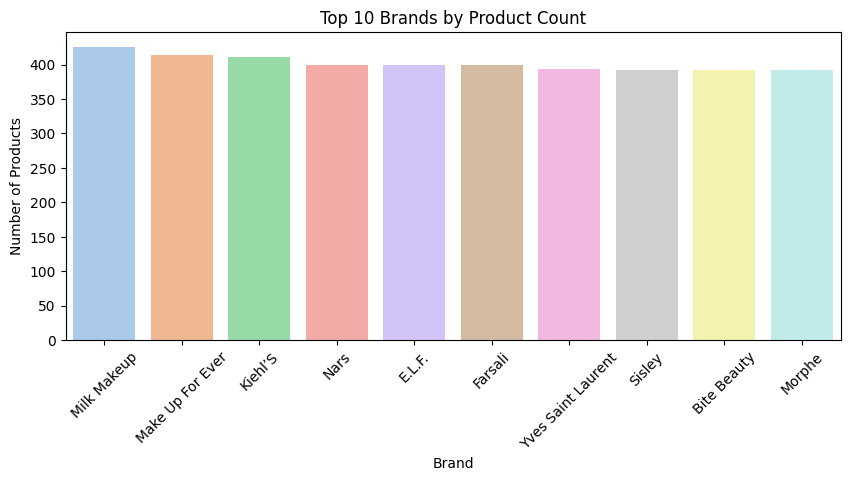

In [115]:
# Top 10 Brands by Count
plt.figure(figsize=(10, 4))
top_brands = df['Brand'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="pastel")
plt.title('Top 10 Brands by Product Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Products')
plt.show()


/tmp/ipython-input-116-3934727034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


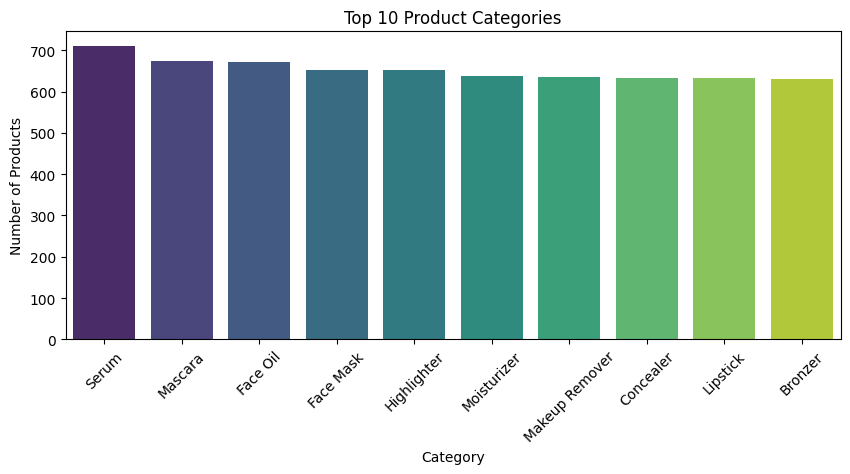

In [116]:
# Top 10 Categories
plt.figure(figsize=(10, 4))
top_categories = df['Category'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title('Top 10 Product Categories')
plt.xticks(rotation=45)
plt.ylabel('Number of Products')
plt.show()

/tmp/ipython-input-141-721281695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


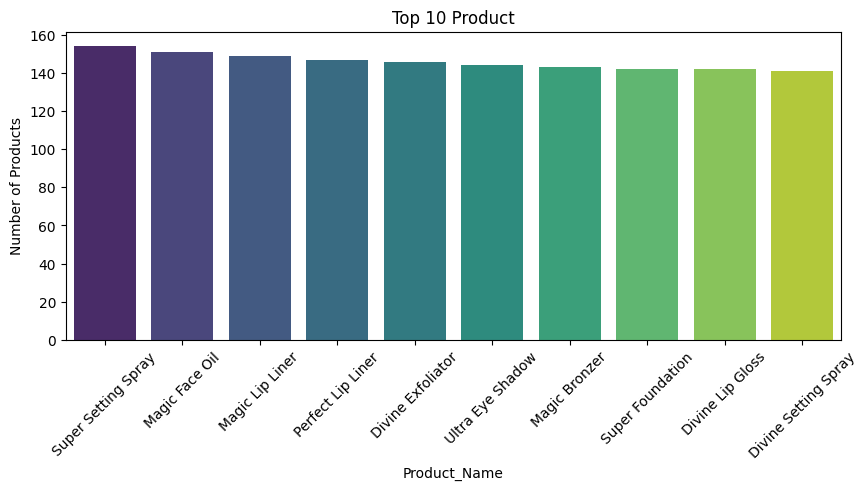

In [141]:
plt.figure(figsize=(10, 4))
top_categories = df['Product_Name'].value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title('Top 10 Product')
plt.xticks(rotation=45)
plt.ylabel('Number of Products')
plt.show()

✅ 3B. Price, Rating, and Reviews Distributions

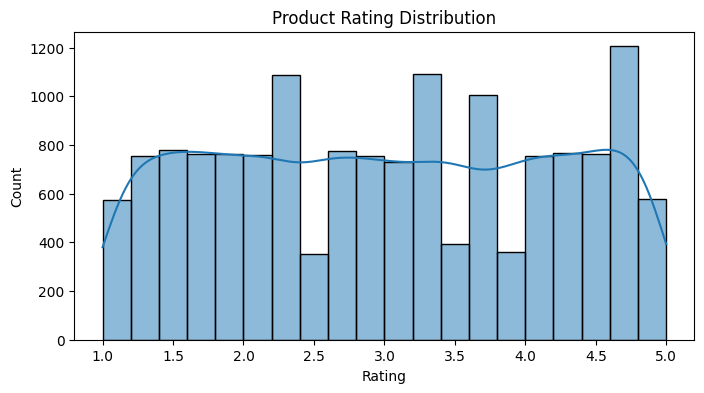

In [117]:
# Ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Product Rating Distribution")
plt.show()

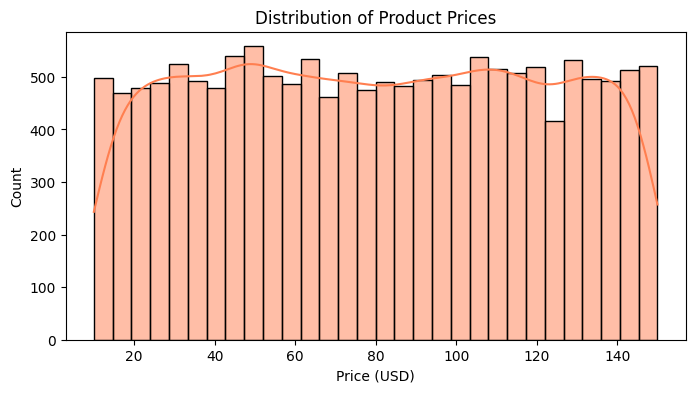

In [118]:
# Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Price_USD'], bins=30, kde=True, color='coral')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.show()

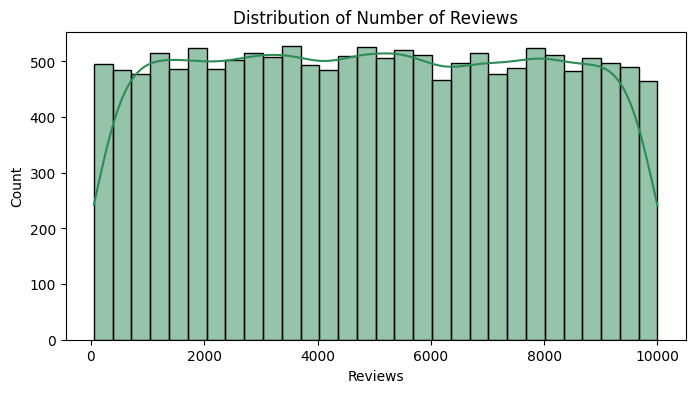

In [119]:
# Number of Reviews
plt.figure(figsize=(8, 4))
sns.histplot(df['Number_of_Reviews'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Reviews')
plt.show()

✅ 3C. Skin Type & Gender Targeting

/tmp/ipython-input-120-422729618.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Skin_Type', order=df['Skin_Type'].value_counts().index, palette='coolwarm')


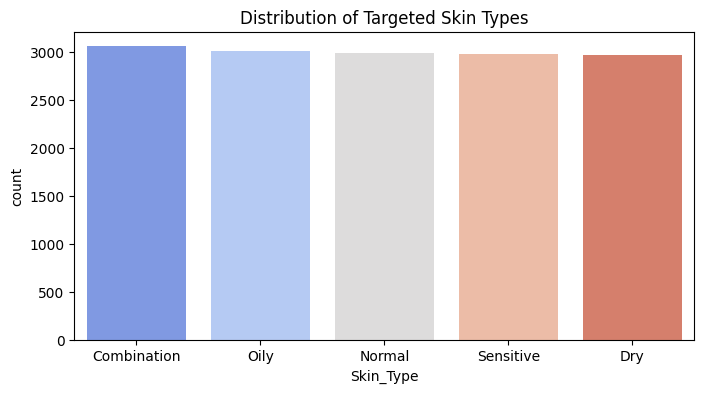

In [120]:
# Skin Type Targeting
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Skin_Type', order=df['Skin_Type'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Targeted Skin Types')
plt.show()

/tmp/ipython-input-121-2813280609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender_Target', palette='Set2')


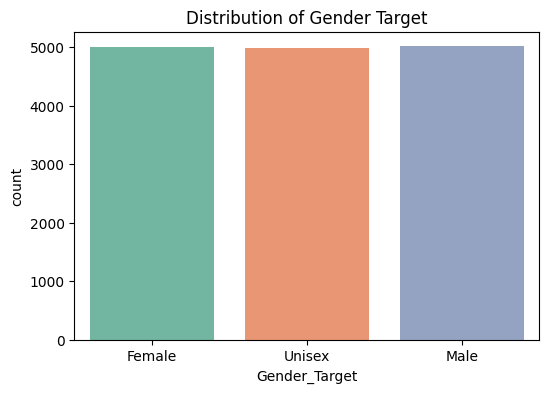

In [121]:
# Gender Targeting
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender_Target', palette='Set2')
plt.title('Distribution of Gender Target')
plt.show()

✅ 3D. Ingredient Popularity

/tmp/ipython-input-122-1028373438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ingredients.index, y=top_ingredients.values, palette='magma')


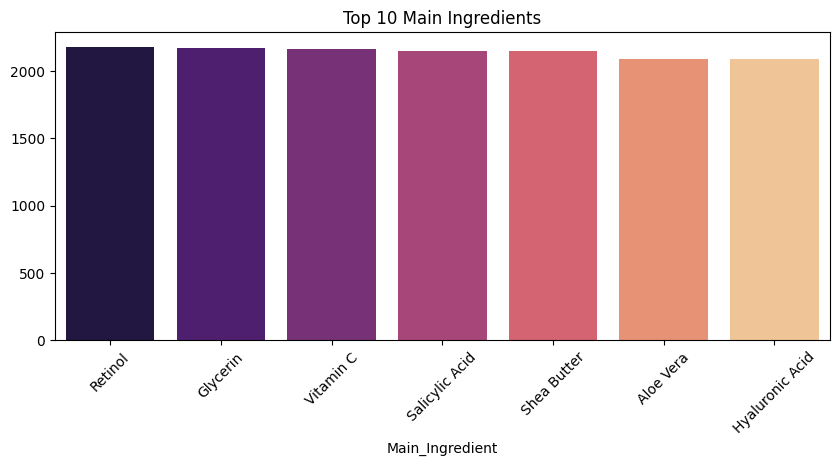

In [122]:
# Top Ingredients
plt.figure(figsize=(10, 4))
top_ingredients = df['Main_Ingredient'].value_counts().head(10)
sns.barplot(x=top_ingredients.index, y=top_ingredients.values, palette='magma')
plt.title('Top 10 Main Ingredients')
plt.xticks(rotation=45)
plt.show()

✅ 3E. Cruelty-Free Distribution

/tmp/ipython-input-123-839336920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cruelty_Free', palette='Set3')


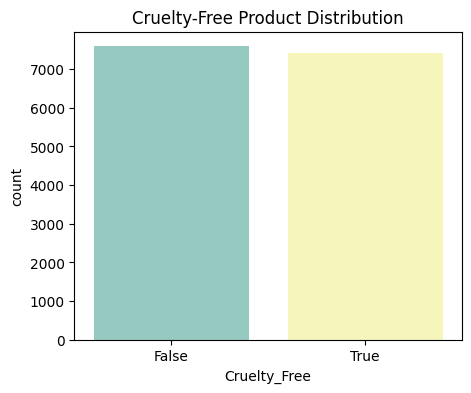

In [123]:
# Cruelty-Free Counts
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Cruelty_Free', palette='Set3')
plt.title('Cruelty-Free Product Distribution')
plt.show()

✅ 3F. Country of Origin & Packaging Trends

/tmp/ipython-input-124-1586370421.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='summer')


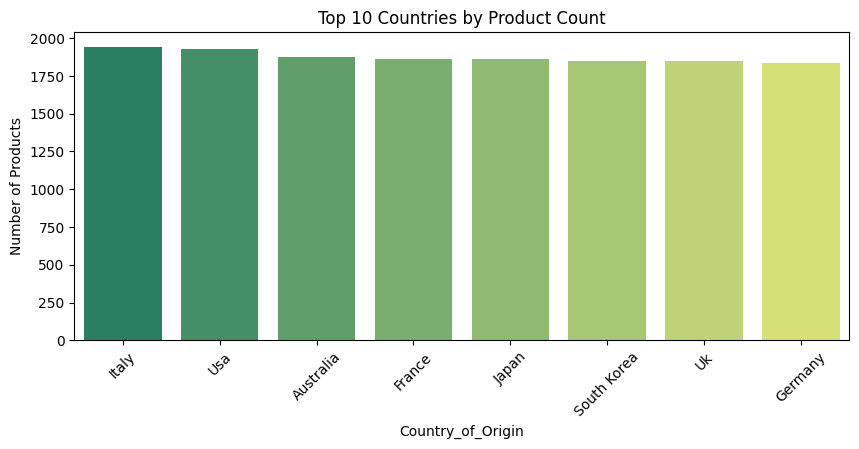

In [124]:
# Country of Origin (Top 10)
plt.figure(figsize=(10, 4))
top_countries = df['Country_of_Origin'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='summer')
plt.title('Top 10 Countries by Product Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Products')
plt.show()

/tmp/ipython-input-125-2241447856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Packaging_Type', order=df['Packaging_Type'].value_counts().index, palette='Spectral')


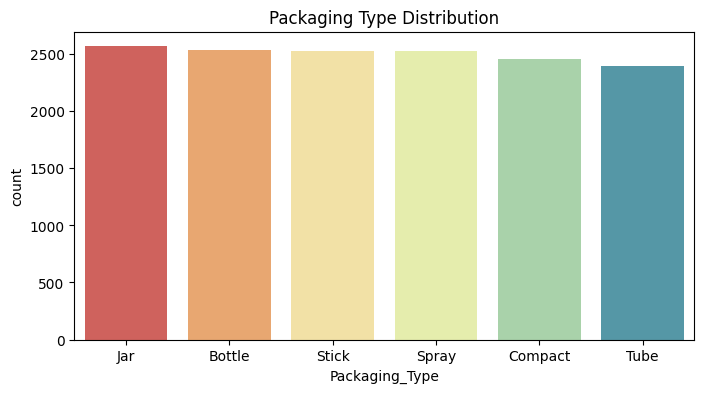

In [125]:
# Packaging Type
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Packaging_Type', order=df['Packaging_Type'].value_counts().index, palette='Spectral')
plt.title('Packaging Type Distribution')
plt.show()

- Most products are priced under $150, with ratings skewed between 3 and 4.5.
- A few brands like "Milk-Makeup" and "Makeup-Forever" dominate product volume.
- Combination and oily skin types are most targeted.
- Most products are for females, though unisex options are common.
- Glycerin and Retinol are the most used ingredients.
- Products from the UK, Italy, and Germany appear frequently.
- Cruelty-Free products are quite popular and span various price ranges.

**🧠 4. Market Research on Beauty & Cosmetics Trends**

## 4A. Market Research on Beauty & Cosmetics Trends

We’ll identify:
- Which brands, categories, and ingredients dominate the market
- Trends by gender, skin type, packaging, and region
- Key pricing and quality patterns

This research helps manufacturers and retailers understand current demand.

In [126]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [127]:
# Encode usage frequency
freq_encoder = LabelEncoder()
df['Usage_Encoded'] = freq_encoder.fit_transform(df['Usage_Frequency'])
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin,Size_ml,Price_per_ml,Popularity_Score,Usage_Encoded
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30Ml,Sensitive,Female,Tube,Retinol,False,Australia,30.0,2.261667,9.145268,3
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250Ml,Dry,Unisex,Bottle,Shea Butter,False,Uk,250.0,0.465720,36.160278,2
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100Ml,Sensitive,Male,Compact,Aloe Vera,True,Italy,100.0,0.908400,13.640258,0
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250Ml,Normal,Male,Tube,Glycerin,True,South Korea,250.0,0.220680,27.944923,2
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100Ml,Oily,Female,Compact,Glycerin,False,Germany,100.0,1.405600,9.685059,2


In [128]:
X_cluster = df[['Price_USD', 'Rating', 'Number_of_Reviews', 'Usage_Encoded']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)

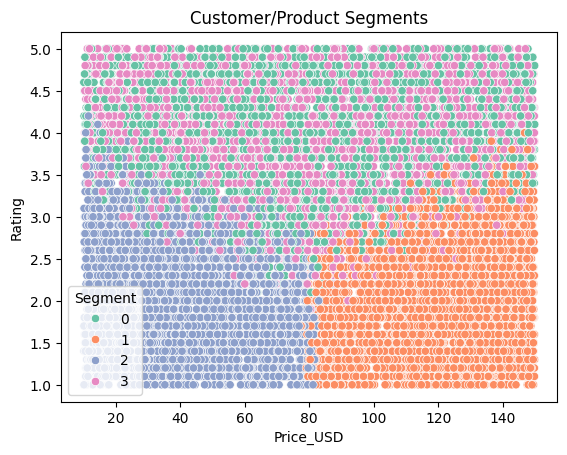

The clustering revealed 4 distinct product segments. Notably, Segment 1 consists of high-priced but poorly rated products — indicating potential dissatisfaction among premium buyers. 
 Segment 0 captures value-driven buyers who prefer affordable, high-rated items. These insights can guide targeted marketing and product development strategies.


In [129]:
# Visualize segments
sns.scatterplot(data=df, x='Price_USD', y='Rating', hue='Segment', palette='Set2')
plt.title("Customer/Product Segments")
plt.show()
print('The clustering revealed 4 distinct product segments. Notably, Segment 1 consists of high-priced but poorly rated products — indicating potential dissatisfaction among premium buyers. \n Segment 0 captures value-driven buyers who prefer affordable, high-rated items. These insights can guide targeted marketing and product development strategies.')

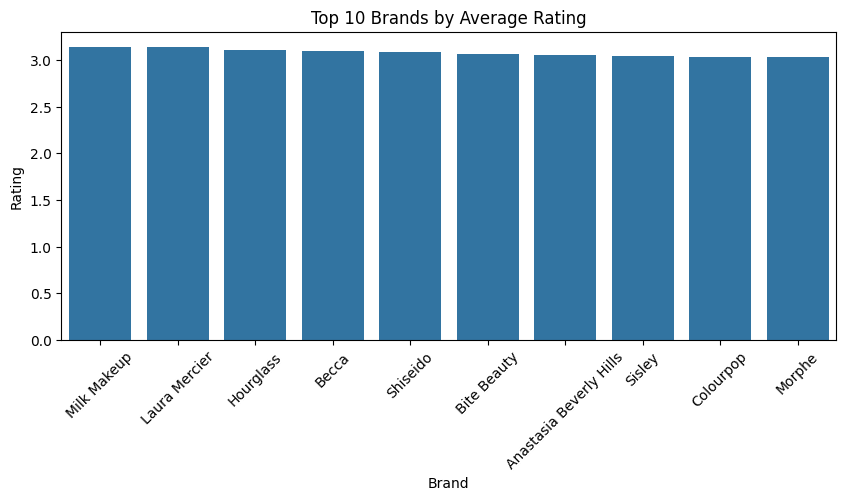

,Rating
Brand,
Milk Makeup,3.160751
Laura Mercier,3.138723
Morphe,3.126429
Hourglass,3.100000
Bite Beauty,3.086594
Becca,3.069231
Shiseido,3.058468
Rare Beauty,3.052593
Anastasia Beverly Hills,3.051163


In [137]:
brand_rating = df.groupby('Brand')[['Rating', 'Number_of_Reviews']].mean().sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=brand_rating.index, y=brand_rating['Rating'])
plt.title("Top 10 Brands by Average Rating")
plt.xticks(rotation=45)
plt.show()

# High review count and high rating = loved brands
popular_brands = df[df['Number_of_Reviews'] > 3000].groupby('Brand')['Rating'].mean().sort_values(ascending=False).head(10)
popular_brands

In [130]:
# Top 10 Brands by Count
df['Brand'].value_counts().head(10)

,count
Brand,
Milk Makeup,426
Make Up For Ever,414
Kiehl’S,411
Nars,400
E.L.F.,399
Farsali,399
Yves Saint Laurent,394
Sisley,392
Bite Beauty,392


In [131]:
# Top 10 Product Categories
df['Category'].value_counts().head(10)

,count
Category,
Serum,710
Mascara,674
Face Oil,671
Face Mask,653
Highlighter,653
Moisturizer,638
Makeup Remover,636
Concealer,633
Lipstick,633


In [132]:
# Top Ingredients
df['Main_Ingredient'].value_counts().head(10)


,count
Main_Ingredient,
Retinol,2180
Glycerin,2174
Vitamin C,2168
Salicylic Acid,2149
Shea Butter,2148
Aloe Vera,2091
Hyaluronic Acid,2090


4B.  Recommendation System for Beauty Products

We’ll build a content-based recommender system using:
- Product category
- Ingredient
- Skin type
- Packaging

We’ll use TF-IDF vectorization and cosine similarity to suggest similar products.

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [134]:
# Combine relevant text columns
df['Combined_Features'] = df['Category'] + ' ' + df['Main_Ingredient'] + ' ' + df['Skin_Type'] + ' ' + df['Packaging_Type']

In [135]:
# Vectorize
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Combined_Features'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [140]:
def recommend(product_name, top_n=5):
    idx = df[df['Product_Name'] == product_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommended = df.iloc[[i[0] for i in sim_scores]]['Product_Name'].tolist()
    return recommended

# Example
print('A user who likes Ultra Face Mask might also enjoy products with similar skin-type targets and ingredients such as: ',recommend('Ultra Face Mask'))

A user who likes Ultra Face Mask might also enjoy products with similar skin-type targets and ingredients such as:  ['Magic Foundation', 'Super Cc Cream', 'Ultra Foundation', 'Ultra Eye Shadow', 'Divine Face Mask']


In [142]:
recommend('Super Setting Spray')

['Magic Cc Cream',
 'Perfect Cleanser',
 'Perfect Eyeliner',
 'Divine Blush',
 'Divine Foundation']

4C. Brand Popularity & Customer Feedback Patterns

We’ll analyze:
- Average product rating per brand
- Review volume per brand
- Popularity score = Rating × log(Number_of_Reviews)

This helps identify market leaders and brands with strong customer loyalty.


In [146]:
# Create popularity score
import numpy as np
df['Popularity_Score'] = df['Rating'] * np.log1p(df['Number_of_Reviews'])

# Brand-wise Aggregates
brand_stats = df.groupby('Brand')[['Rating', 'Number_of_Reviews', 'Popularity_Score']].mean().sort_values(by='Popularity_Score', ascending=False)

# Top 10 Popular Brands
brand_stats.head(10)



,Rating,Number_of_Reviews,Popularity_Score
Brand,,,
Hourglass,3.113934,5101.527322,25.773182
Milk Makeup,3.146479,4819.154930,25.717373
Becca,3.100000,5134.048969,25.677672
Laura Mercier,3.141127,4630.340845,25.459334
Bite Beauty,3.065816,5229.767857,25.415641
Shiseido,3.090541,4877.654054,25.346929
Morphe,3.031122,5055.461735,25.154650
Colourpop,3.039024,5263.231707,25.103925
Anastasia Beverly Hills,3.052846,5023.463415,25.077031


💡 Brands like Hourglass and Milk Makeup consistently score high in both ratings and reviews, indicating strong brand loyalty and satisfaction

## ✅ Project Progress Summary

We’ve successfully:
- Uncovered market trends across brands, categories, and ingredients
- Built a content-based recommendation engine
- Identified top-performing brands via customer feedback
- Created behavioral customer segments for targeted strategies

Next, we’ll build a Power BI dashboard to visualize these insights interactively.

In [147]:
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin,Size_ml,Price_per_ml,Popularity_Score,Usage_Encoded,Segment,Combined_Features
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30Ml,Sensitive,Female,Tube,Retinol,False,Australia,30.0,2.261667,9.145268,3,2,Blush Retinol Sensitive Tube
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250Ml,Dry,Unisex,Bottle,Shea Butter,False,Uk,250.0,0.465720,36.160278,2,3,Makeup Remover Shea Butter Dry Bottle
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100Ml,Sensitive,Male,Compact,Aloe Vera,True,Italy,100.0,0.908400,13.640258,0,1,Highlighter Aloe Vera Sensitive Compact
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250Ml,Normal,Male,Tube,Glycerin,True,South Korea,250.0,0.220680,27.944923,2,3,Face Mask Glycerin Normal Tube
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100Ml,Oily,Female,Compact,Glycerin,False,Germany,100.0,1.405600,9.685059,2,1,Highlighter Glycerin Oily Compact


In [149]:
df.to_csv('Beauty.csv')